In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import math

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [3]:
Dataset = pd.read_csv('winequality-red.csv',sep=';')

In [4]:
Dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
Dataset.shape

(1599, 12)

In [7]:
Dataset.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:>

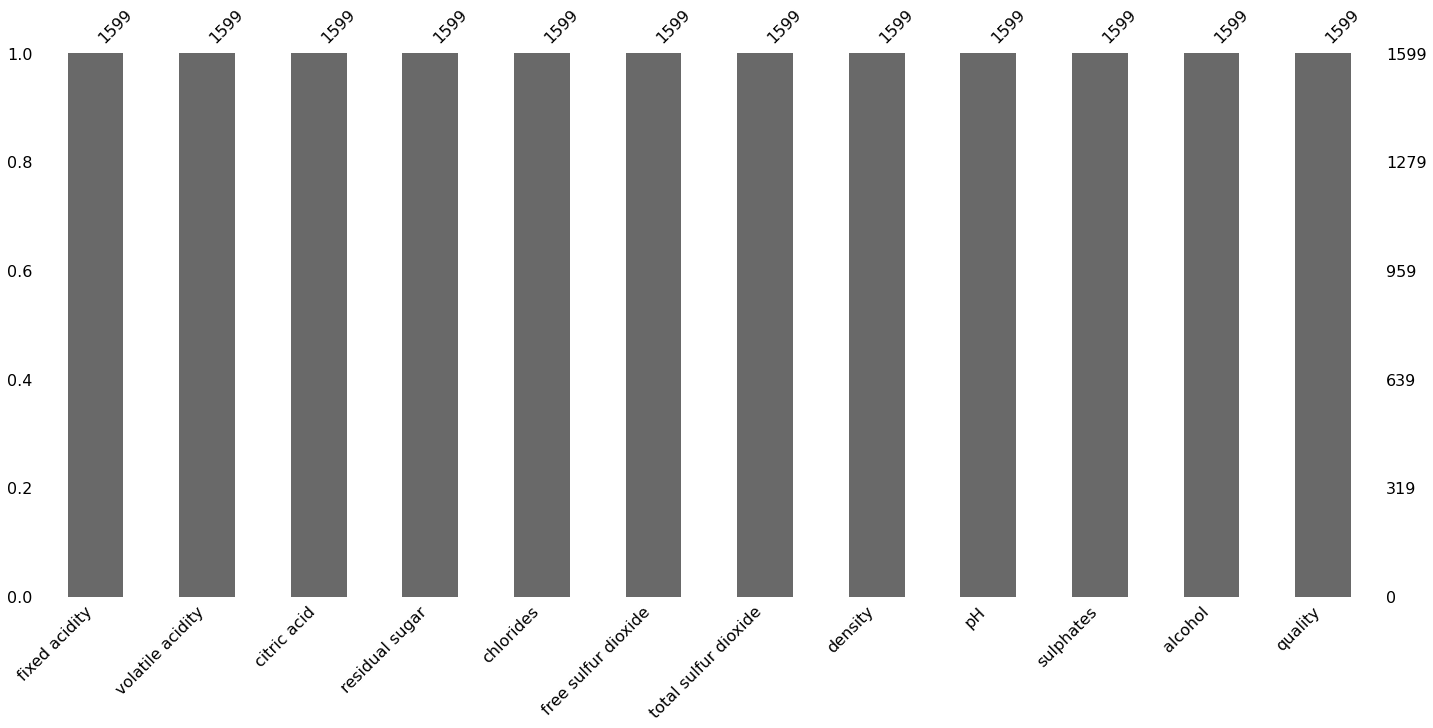

In [8]:
#Dataset.isnull().sum()
msno.bar(Dataset)

In [9]:
Dataset.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

No handles with labels found to put in legend.


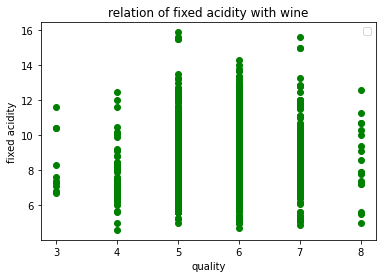

In [10]:
# checking the variation of fixed acidity in the different qualities of wine

plt.scatter(Dataset['quality'], Dataset['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


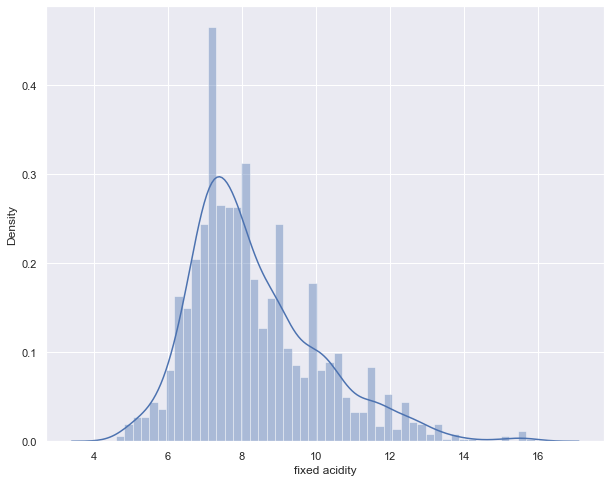

In [11]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['fixed acidity'], bins=50)
plt.show()

No handles with labels found to put in legend.


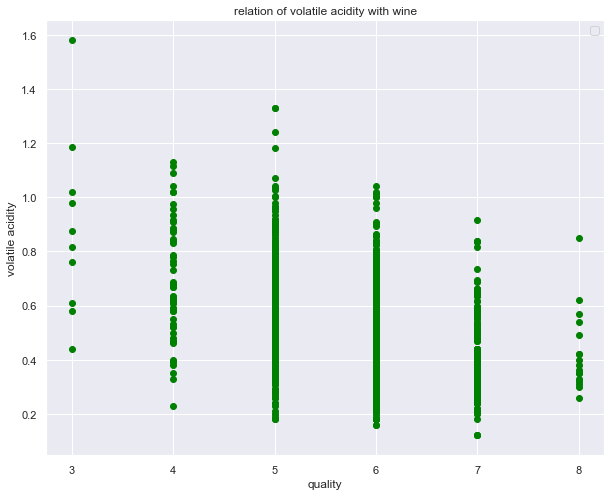

In [12]:
plt.scatter(Dataset['quality'], Dataset['volatile acidity'], color = 'green')
plt.title('relation of volatile acidity with wine')
plt.xlabel('quality')
plt.ylabel('volatile acidity')
plt.legend()
plt.show()

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


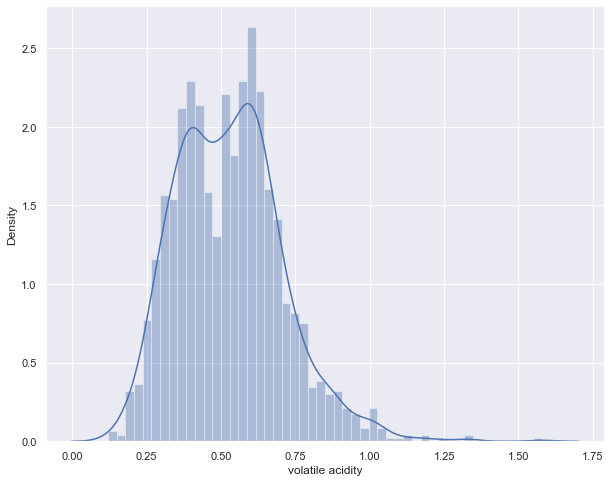

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['volatile acidity'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

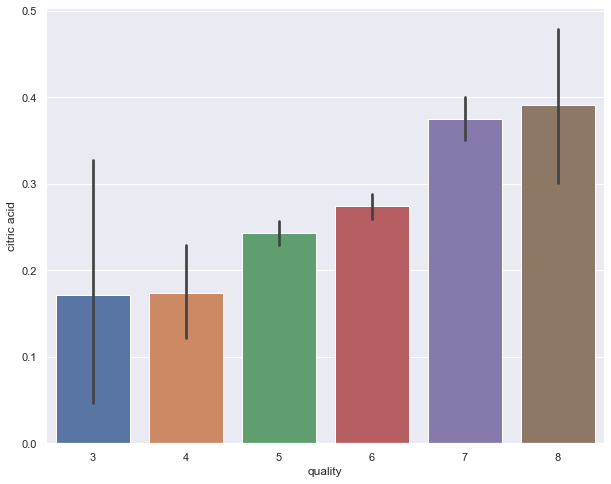

In [14]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'citric acid', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


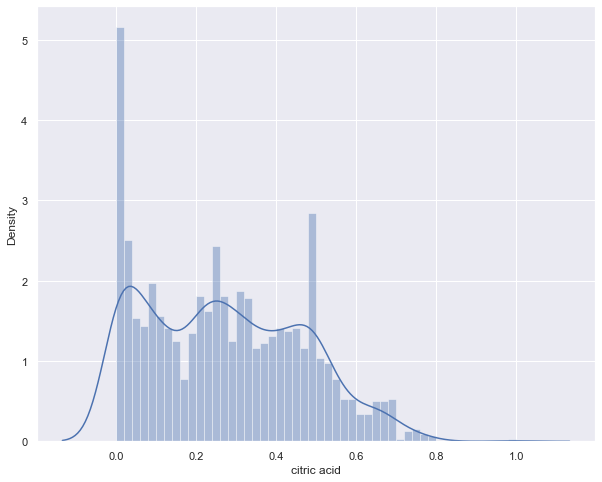

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['citric acid'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

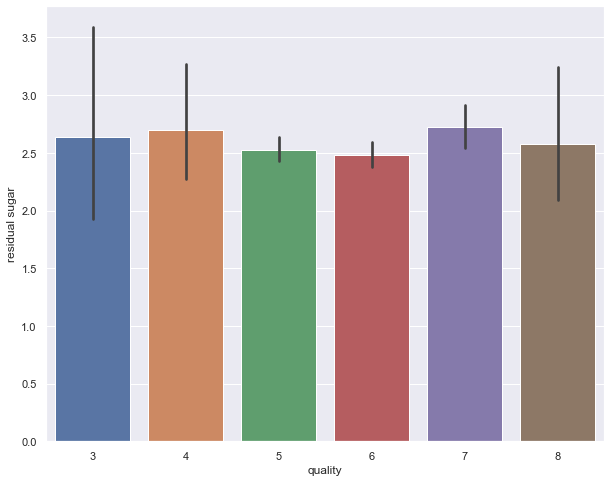

In [16]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'residual sugar', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


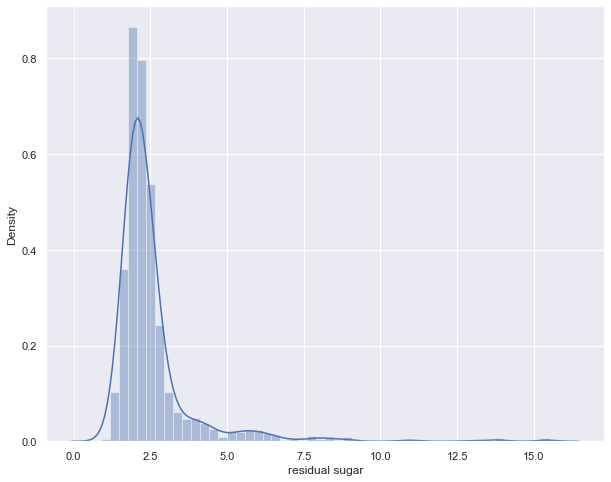

In [17]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['residual sugar'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

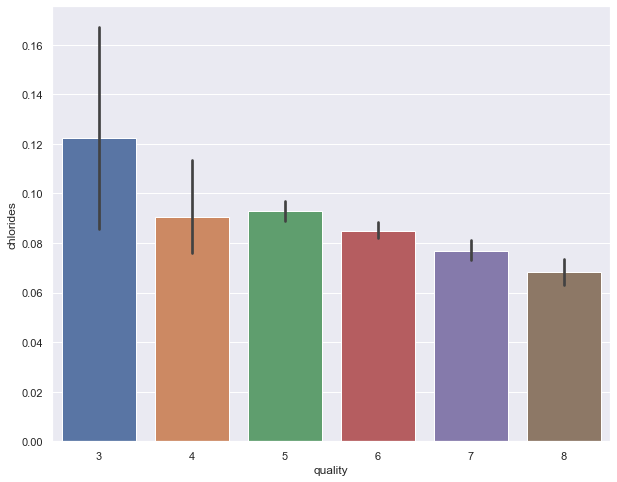

In [18]:
#Composition of chloride also go down as we go higher in the quality of the wine

fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'chlorides', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


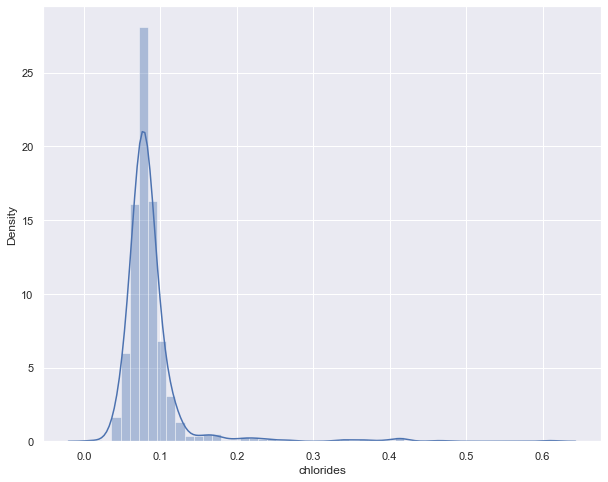

In [19]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['chlorides'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

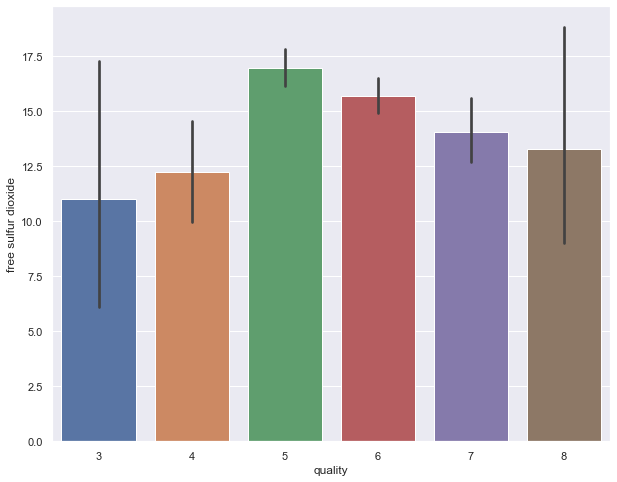

In [20]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


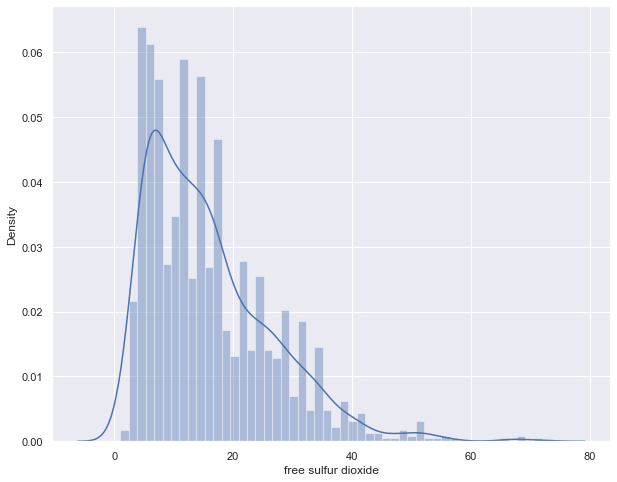

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['free sulfur dioxide'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

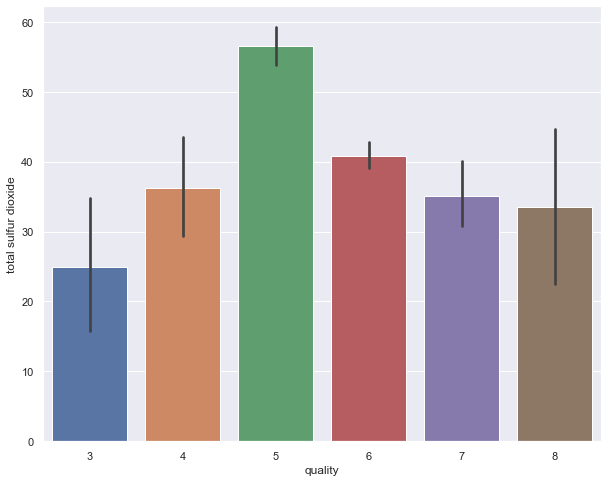

In [22]:

fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


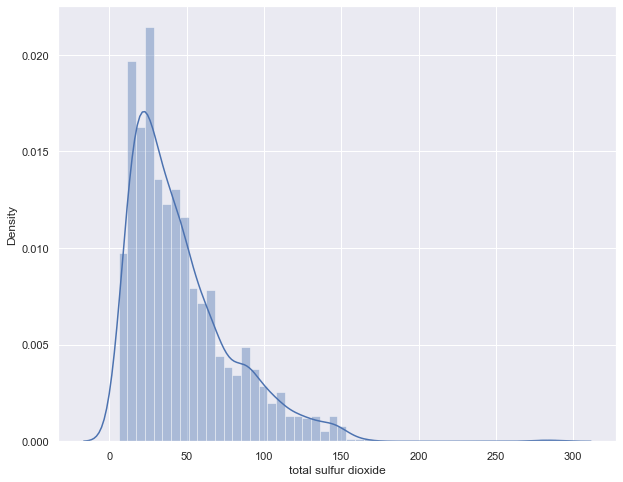

In [23]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['total sulfur dioxide'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='density'>

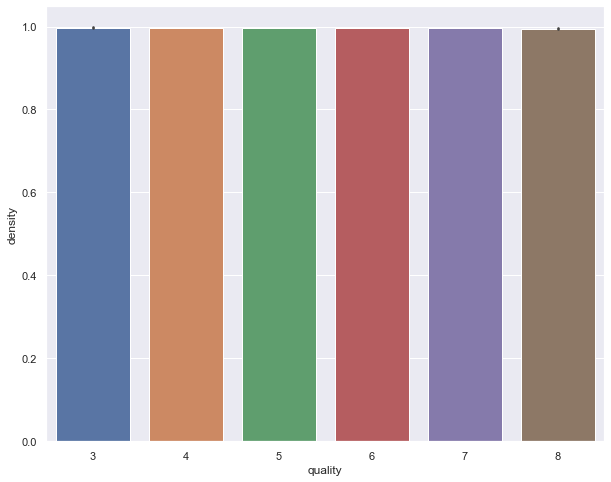

In [24]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'density', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


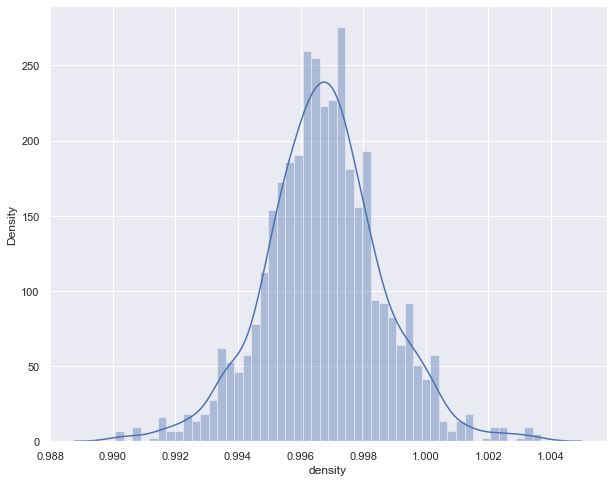

In [25]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['density'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='pH'>

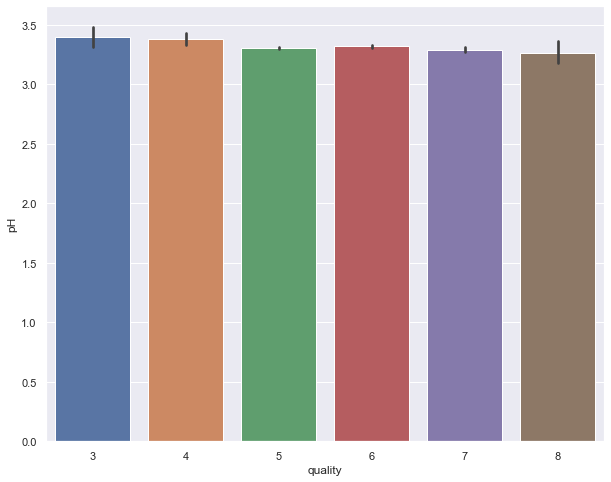

In [26]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'pH', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


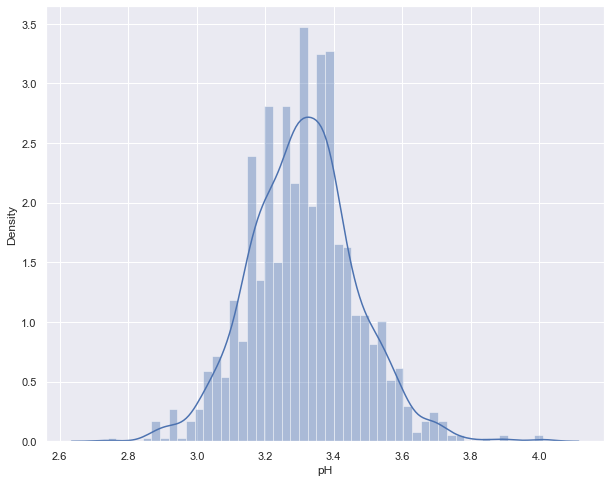

In [27]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['pH'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

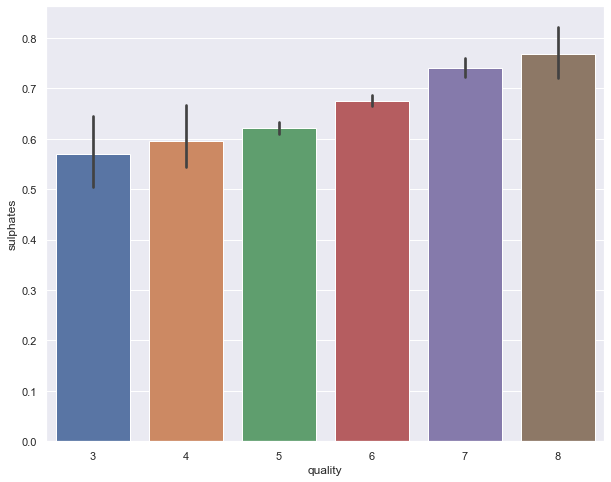

In [28]:
#Sulphates level goes higher with the quality of wine
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'sulphates', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


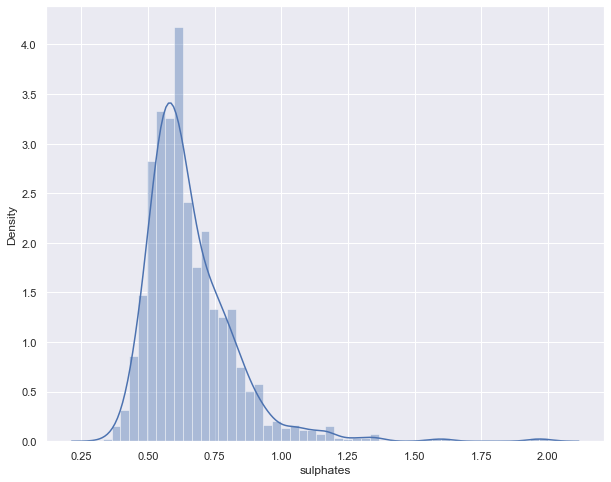

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['sulphates'], bins=50)
plt.show()

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

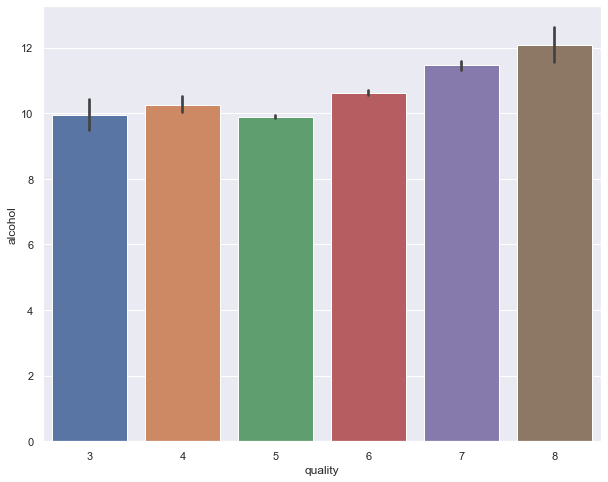

In [30]:
fig = plt.figure(figsize = (10,8))
sns.barplot(x = 'quality', y = 'alcohol', data = Dataset)

c:\users\vivek\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


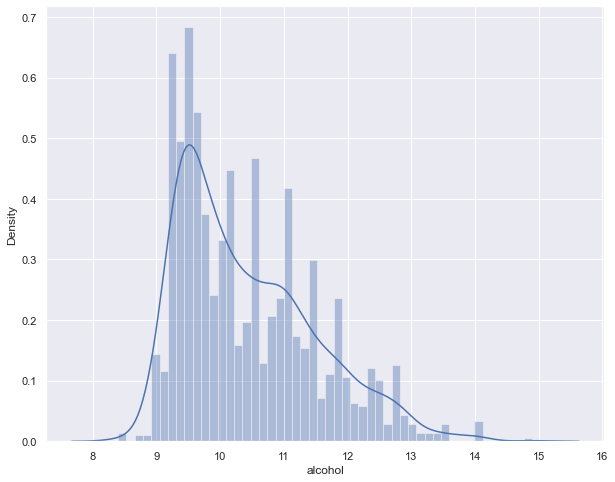

In [31]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(Dataset['alcohol'], bins=50)
plt.show()

<AxesSubplot:>

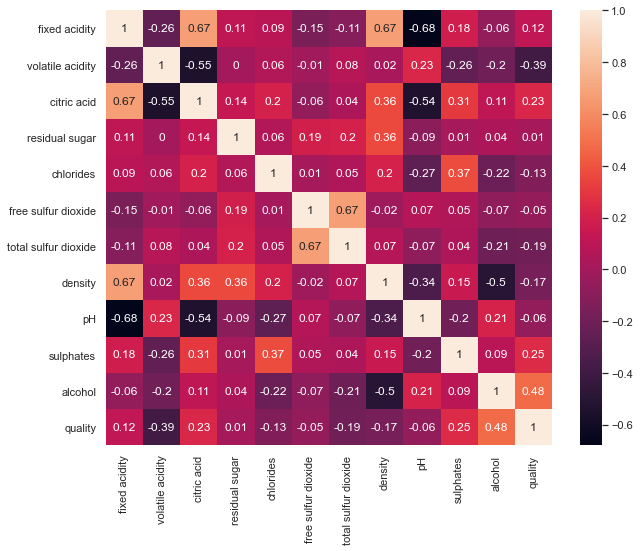

In [32]:
correlation_matrix = Dataset.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

Positively correlated items are : fixed acidity & citric acid, free sulphur dioxide & total sulphor dioxide, fixed acidity & density, and alcohol & quality, sulphates & quality.

Negatively correlated items : fixed acidity & pH, citric acid & volatile acidity, citric acid & pH, density & alcohol, volatile acidity & quality.

For quality alcohol, sulphates, citric acid, and volatile acicity are some of the important features to determine quality of wine.

In [33]:
Dataset['quality_label'] = Dataset['quality'].map({3:'bad',4:'bad',5:'average',6:'average',7:'good',8:'good'})

In [34]:
Dataset.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,average
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,average
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,average


<AxesSubplot:xlabel='quality_label', ylabel='alcohol'>

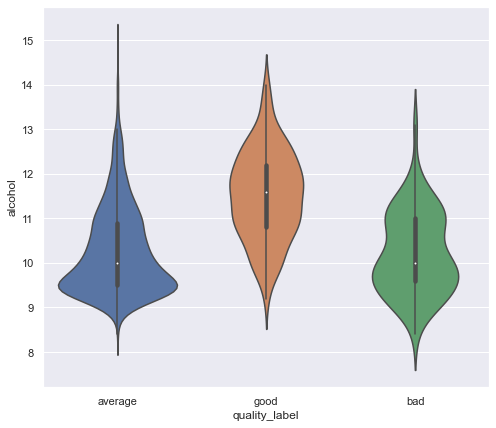

In [35]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="quality_label", y ="alcohol", data = Dataset)

<AxesSubplot:xlabel='quality_label', ylabel='volatile acidity'>

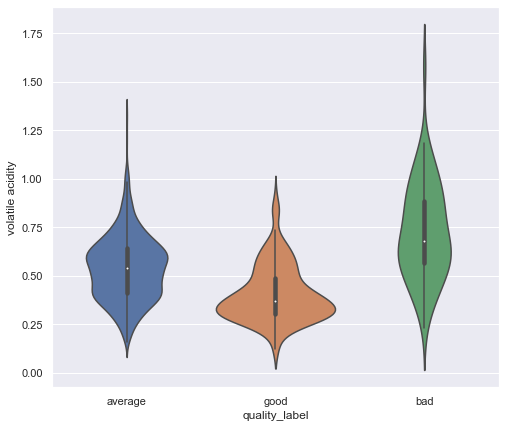

In [36]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="quality_label", y ="volatile acidity", data = Dataset, split = True)

<AxesSubplot:xlabel='quality_label', ylabel='citric acid'>

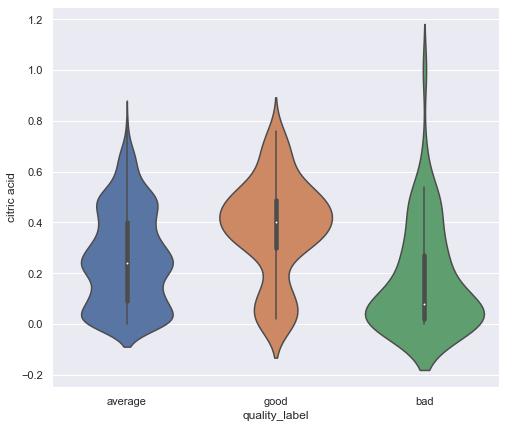

In [37]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="quality_label", y ="citric acid", data = Dataset, split = True)

<AxesSubplot:xlabel='quality_label', ylabel='sulphates'>

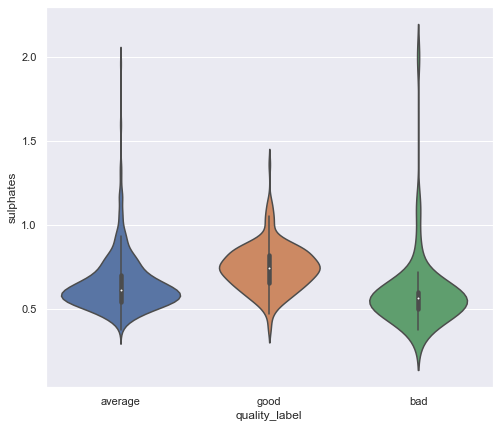

In [38]:
plt.subplots(figsize = (8,7))
sns.violinplot(x ="quality_label", y ="sulphates", data = Dataset, split = True)

In [39]:
Dataset.quality_label.value_counts()

average    1319
good        217
bad          63
Name: quality_label, dtype: int64

<AxesSubplot:xlabel='quality_label', ylabel='count'>

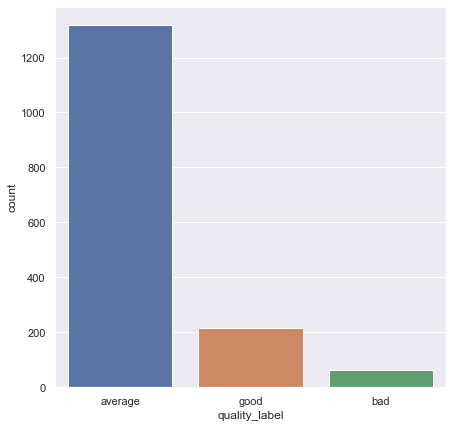

In [40]:
plt.subplots(figsize = (7,7))
sns.countplot(x=Dataset.quality_label)

Here we have data imbalance, so we need to take care of it too

In [41]:
classweight_average = (1599/(3*1319))
classweight_good = (1599/(3*217))
classweight_bad = (1599/(3*63))

In [42]:
classweight_average,classweight_good, classweight_bad

(0.4040940106141016, 2.456221198156682, 8.46031746031746)

In [72]:
Y = Dataset[['quality_label']]

In [73]:
Y

,quality_label
0,average
1,average
2,average
3,average
4,average
...,...
1594,average
1595,average
1596,average
1597,average


In [45]:
label = LabelEncoder()
Y_labeled = label.fit_transform(Y)

In [46]:
Y = Y_labeled.reshape(-1,1)
Y.shape

(1599, 1)

average  = class 0  
bad      = class 1    
good     = class 2 

In [47]:
classweight_0 = classweight_average
classweight_1 = classweight_bad
classweight_2 = classweight_good

In [48]:
classweight_0,classweight_1, classweight_2

(0.4040940106141016, 8.46031746031746, 2.456221198156682)

In [49]:
X = Dataset.iloc[:,:11]

In [50]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [51]:
skf = StratifiedKFold()
kf = KFold()
scaler = StandardScaler()

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
model = RandomForestClassifier(n_estimators = 150,class_weight = "balanced",criterion = "gini",min_samples_split=10,oob_score=True,max_depth=20)

In [54]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

scores_RF = []

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

for train_index, test_index in kf.split(X,Y):
    X_train,X_test,Y_train,Y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scores_RF.append(get_score(model,X_train_scaled,X_test_scaled,Y_train,Y_test))

In [56]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
model.fit(X_train_scaled,Y_train)
Y_pred = model.predict(X_test_scaled)

<ipython-input-60-936868ab74dc>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train_scaled,Y_train)


In [61]:
print('Test performance')
print(classification_report(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y_test, Y_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y_test, Y_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y_test,Y_pred))

Test performance
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       395
           1       0.00      0.00      0.00        18
           2       0.60      0.61      0.61        67

    accuracy                           0.85       480
   macro avg       0.50      0.51      0.51       480
weighted avg       0.82      0.85      0.83       480

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[365   3  27]
 [ 18   0   0]
 [ 26   0  41]]
-------------------------------------------------------
-------------------------------------------------------
Precision
[0.89242054 0.         0.60294118]
-------------------------------------------------------
-------------------------------------------------------
Recall
[0.92405063 0.         0.6119403 ]
-------------------------------------------------------
-------------------------------------------------------
F1-s

In [59]:
Y_pred.reshape(-1,1).shape

(480, 1)

predict_proba(X)

In [63]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print(importances)
print('--------------------------------------------------------------')
print(sorted_indices)
print('--------------------------------------------------------------')
print(importances[sorted_indices])

[0.05817721 0.13492821 0.07015286 0.05517494 0.07100002 0.05573071
 0.08937806 0.06195358 0.06110436 0.17103579 0.17136426]
--------------------------------------------------------------
[10  9  1  6  4  2  7  8  0  5  3]
--------------------------------------------------------------
[0.17136426 0.17103579 0.13492821 0.08937806 0.07100002 0.07015286
 0.06195358 0.06110436 0.05817721 0.05573071 0.05517494]


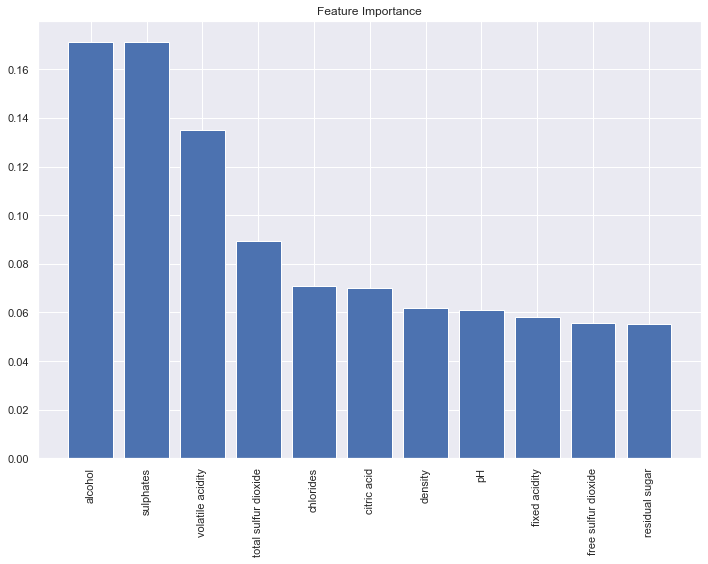

In [64]:
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [65]:
results = permutation_importance(model, X, Y,random_state=2)

In [66]:
importance1 = results.importances_mean
print(importance1)
print('-----------------------------------------------------------')
sorted_indices = np.argsort(importance1)[::-1]
print(sorted_indices)
print('-----------------------------------------------------------')
importance1[sorted_indices]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-----------------------------------------------------------
[10  9  8  7  6  5  4  3  2  1  0]
-----------------------------------------------------------


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importance1[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [70]:
X1 = Dataset[['alcohol','sulphates','volatile acidity']]

In [71]:
X1

,alcohol,sulphates,volatile acidity
0,9.4,0.56,0.700
1,9.8,0.68,0.880
2,9.8,0.65,0.760
3,9.8,0.58,0.280
4,9.4,0.56,0.700
...,...,...,...
1594,10.5,0.58,0.600
1595,11.2,0.76,0.550
1596,11.0,0.75,0.510
1597,10.2,0.71,0.645


In [74]:
Y

,quality_label
0,average
1,average
2,average
3,average
4,average
...,...
1594,average
1595,average
1596,average
1597,average


In [75]:
X1_train, X1_test, Y_train, Y_test = train_test_split(X1, Y, test_size=0.3, random_state=42)

In [76]:
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [77]:
model.fit(X1_train_scaled,Y_train)
Y1_pred = model.predict(X1_test_scaled)

<ipython-input-77-fc7efcb91de0>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X1_train_scaled,Y_train)


In [78]:
print('Test performance')
print(classification_report(Y_test, Y1_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Confusion matrix')
print(confusion_matrix(Y_test, Y1_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Precision')
print(precision_score(Y_test, Y1_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Recall')
print(recall_score(Y_test, Y1_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('F1-score')
print(f1_score(Y_test, Y1_pred,average=None))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Accuracy')
print(accuracy_score(Y_test, Y1_pred))
print('-------------------------------------------------------')
print('-------------------------------------------------------')
print('Matthews correlation coefficient')
print(matthews_corrcoef(Y_test,Y1_pred))

Test performance
              precision    recall  f1-score   support

     average       0.90      0.87      0.88       395
         bad       0.22      0.11      0.15        18
        good       0.47      0.63      0.54        67

    accuracy                           0.80       480
   macro avg       0.53      0.53      0.52       480
weighted avg       0.81      0.80      0.81       480

-------------------------------------------------------
-------------------------------------------------------
Confusion matrix
[[342   6  47]
 [ 16   2   0]
 [ 24   1  42]]
-------------------------------------------------------
-------------------------------------------------------
Precision
[0.89528796 0.22222222 0.47191011]
-------------------------------------------------------
-------------------------------------------------------
Recall
[0.86582278 0.11111111 0.62686567]
-------------------------------------------------------
-------------------------------------------------------
F1-s